In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

/home/d_nguyen11/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


Import Data and Split for Training & Testing

In [2]:
pip install -U matplotlib

Requirement already up-to-date: matplotlib in ./.local/lib/python3.8/site-packages (3.7.5)
Note: you may need to restart the kernel to use updated packages.


In [3]:
ind1 = 1
ind2 = 7
denoisedData = pd.read_csv(f"/home/d_nguyen11/Documents/reu_stats_2024/HAR/ppg+dalia/data/PPG_FieldStudy/S{ind1}/S{ind1}_E4/ACC_with_activity_denoised.csv")
denoisedData2 = pd.read_csv(f"/home/d_nguyen11/Documents/reu_stats_2024/HAR/ppg+dalia/data/PPG_FieldStudy/S{ind2}/S{ind2}_E4/ACC_with_activity_denoised.csv")

X = denoisedData[["denoised_acc_x","denoised_acc_y", "denoised_acc_z"]]
y = denoisedData["activity"]

denoisedData2Features = denoisedData2[["denoised_acc_x", "denoised_acc_y", "denoised_acc_z"]].to_numpy()
denoisedData2Activity = denoisedData2[["activity"]].to_numpy()

# denoisedData[['denoised_acc_x',"denoised_acc_y","denoised_acc_z"]].plot(title='Denoised Acc', xlabel='Index', ylabel='Values')
# denoisedData2[['denoised_acc_x',"denoised_acc_y","denoised_acc_z"]].plot(title='Denoised Acc 2', xlabel='Index', ylabel='Values')

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=0)

Normalize the Data

In [4]:
# Normalize
X_train = StandardScaler().fit_transform(X_train)
X_val = StandardScaler().fit_transform(X_val)
denoisedData2Features = StandardScaler().fit_transform(denoisedData2Features)

kNN-model

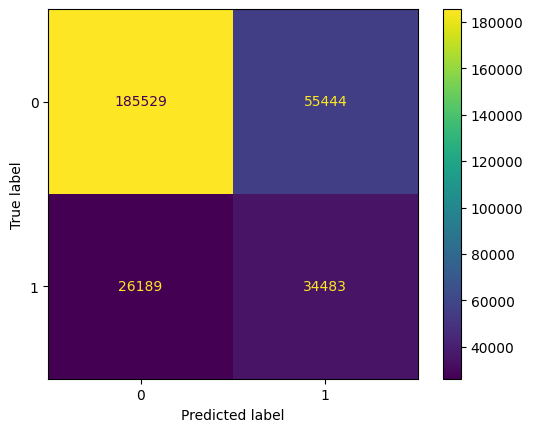

Accuracy Rate: 0.7293739329344097


In [5]:
# Using general KNN model
knn = KNeighborsClassifier(10)
knn.fit(X_train, y_train)

#y_pred = knn.predict(X_val)
y_val = denoisedData2Activity
y_pred = knn.predict(denoisedData2Features)
cmat = confusion_matrix(y_val, y_pred) #validate model predictions with actual y values
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cmat, display_labels = [0, 1])
cm_display.plot()
plt.show()

print("Accuracy Rate: " + str(format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat)))))

Using Support Vector Machine

In [6]:
# from sklearn.svm import SVC

# ind = 1
# df = pd.read_csv(f"/content/drive/MyDrive/ResearchProject/HAR/ppg+dalia/data/PPG_FieldStudy/S{ind}/S{ind}_E4/ACC_with_activity_denoised.csv")
# X = df[["denoised_acc_x","denoised_acc_y", "denoised_acc_z"]]
# y = df["activity"]

# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=0)
# svm_model = SVC(kernel='linear')
# svm_model.fit(X_train, y_train)

# y_pred = svm_model.predict(X_val)
# accuracy = accuracy_score(y_val, y_pred)
# print("Accuracy: ", accuracy)

Subject-Dependent Test (Work extremely well)

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

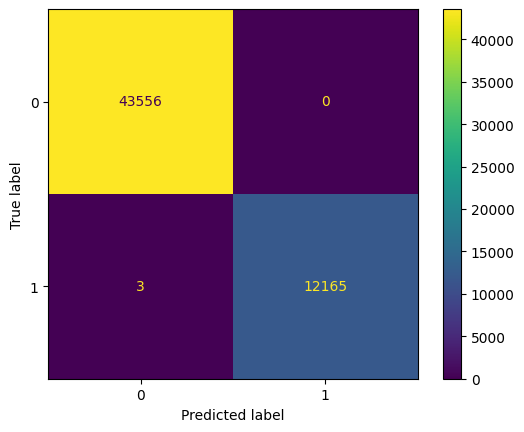

In [8]:
ind = 9
df = pd.read_csv(f"/home/d_nguyen11/Documents/reu_stats_2024/HAR/ppg+dalia/data/PPG_FieldStudy/S{ind}/S{ind}_E4/ACC_with_activity_denoised.csv")

# Creating train set and test set.
X = df[["denoised_acc_x","denoised_acc_y", "denoised_acc_z"]]
y = df["activity"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=0)

knn = KNeighborsClassifier(10)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_val)

conf_matrix = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
disp.plot()
plt.show()

Now we aggregate the data and train based on that.

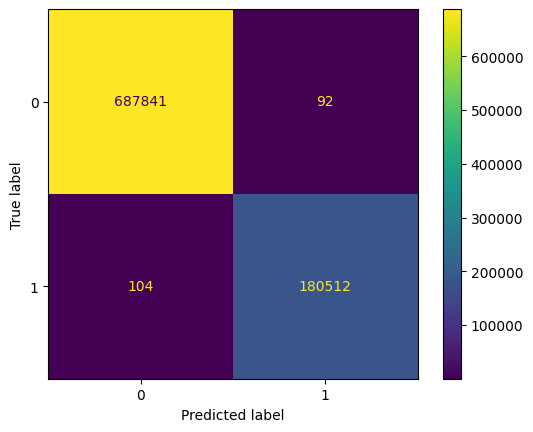

Accuracy Rate: 0.7293739329344097


In [9]:
df_list = []
for ind in range(1  ,16):
  df = pd.read_csv(f"/home/d_nguyen11/Documents/reu_stats_2024/HAR/ppg+dalia/data/PPG_FieldStudy/S{ind}/S{ind}_E4/ACC_with_activity_denoised.csv")
  df_list.append(df)

df = pd.concat(df_list)
# Creating train set and test set.
X = df[["denoised_acc_x","denoised_acc_y", "denoised_acc_z"]]
y = df["activity"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=0)

# Normalize
X_train = StandardScaler().fit_transform(X_train)
X_val = StandardScaler().fit_transform(X_val)


knn = KNeighborsClassifier(10)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_val)

conf_matrix = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=knn.classes_)
disp.plot()
plt.show()
print("Accuracy Rate: " + str(format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat)))))

We now apply the model on our Big Ideas dataset to detect activities.

In [10]:
import os

In [11]:
# In suplement_activity_detection.ipynb, we have denoised data on continuous intervals.

def apply_model(ind):

  folder_path = f'/home/d_nguyen11/Documents/reu_stats_2024/datafiles/{ind}/'
  all_files = os.listdir(folder_path)
  csv_files = [file for file in all_files if file.startswith('denoised_ACC')]

  for file in csv_files:
    df = pd.read_csv(os.path.join(folder_path, file))
    if "Unnamed: 0" in df.columns:
      df.drop(columns=['Unnamed: 0'], inplace=True)

    X_val = df[["denoised_acc_x","denoised_acc_y", "denoised_acc_z"]]
    X_val = StandardScaler().fit_transform(X_val)
    y_pred = knn.predict(X_val)

    df["activity"] = y_pred

    filename = f'ml_classified_{file}'
    df.to_csv(os.path.join(folder_path, filename), index=False)

In [14]:
ind_list = []
for i in range(16, 17):
  if i < 10:
    ind_list.append(f'00{i}')
  else:
    ind_list.append(f'0{i}')
for ind in ind_list:
  apply_model(ind)